# 1.0 Data Processing

## 1.3 Synthetic Data Generation

Given the limited availability of only two poses from a single pose class, it is imperative to augment the dataset within each class. Through the application of rotational transformations, we are able to estimate the positioning of vectors contingent upon a specified degree of rotation. To comprehensively capture the entirety of the pose, we incrementally generate data by rotating +10 degrees until a full 360-degree rotation is achieved, subsequently validating the original vector against the final vector to ensure consistency and accuracy in the transformation process.

Sources:
- https://stackoverflow.com/questions/6802577/rotation-of-3d-vector
- https://en.wikipedia.org/wiki/Euler%E2%80%93Rodrigues_formula

### Raw Data

In [24]:
import pandas as pd

data = pd.read_csv("dataset/pose_data_raw.csv")
data

,image_filename,pose_name,landmark_00_x,landmark_00_y,landmark_00_z,landmark_00_v,landmark_01_x,landmark_01_y,landmark_01_z,landmark_01_v,...,landmark_30_z,landmark_30_v,landmark_31_x,landmark_31_y,landmark_31_z,landmark_31_v,landmark_32_x,landmark_32_y,landmark_32_z,landmark_32_v
0,advanced-figurehead-lft.png,advanced-figurehead-lft,0.545408,0.259078,-0.407526,0.998032,0.529543,0.271390,-0.377108,0.997484,...,-0.279319,0.921783,0.178496,0.687856,0.396094,0.143073,0.165575,0.687296,-0.299426,0.903340
1,advanced-figurehead-rgt.png,advanced-figurehead-rgt,0.436167,0.272993,0.042864,0.994189,0.451747,0.284805,0.008824,0.993863,...,0.386870,0.028072,0.829540,0.681655,-0.259552,0.234634,0.822786,0.687349,0.296422,0.010969
2,aerial-leg-hold-crucifix-lft.png,aerial-leg-hold-crucifix-lft,0.504749,0.180154,-0.839282,0.999996,0.512618,0.166645,-0.803643,0.999990,...,0.039491,0.902986,0.393930,0.802434,-0.269182,0.987534,0.492710,0.779056,-0.184242,0.970091
3,aerial-leg-hold-crucifix-rgt.png,aerial-leg-hold-crucifix-rgt,0.499891,0.180474,-0.591090,0.999997,0.509142,0.168015,-0.550916,0.999988,...,-0.077581,0.926418,0.508029,0.777915,0.064188,0.965189,0.594786,0.795155,-0.319720,0.984336
4,air-walk-lft.png,air-walk-lft,0.450799,0.341594,-0.282800,0.999512,0.444959,0.327051,-0.349440,0.999634,...,0.380551,0.849768,0.548799,0.843092,-0.280939,0.903217,0.313885,0.762152,0.190190,0.823446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,wrist-sit-rgt.png,wrist-sit-rgt,0.506111,0.534306,-0.154565,0.999970,0.509519,0.520750,-0.135237,0.999945,...,-0.187706,0.993354,0.924881,0.402281,-0.304024,0.996291,0.101837,0.413196,-0.236651,0.989679
540,yogini-lft.png,yogini-lft,0.750999,0.265975,0.050217,1.000000,0.734617,0.252835,0.082880,1.000000,...,0.004372,0.953845,0.225413,0.414827,0.473995,0.646005,0.272044,0.336316,0.049254,0.949220
541,yogini-rgt.png,yogini-rgt,0.254569,0.253966,0.185102,0.999985,0.276668,0.244936,0.168699,0.999988,...,0.462144,0.196382,0.693174,0.359902,-0.068871,0.595498,0.770825,0.392072,0.434250,0.176225
542,yogini-twisted-lft.png,yogini-twisted-lft,0.356109,0.269642,-0.166786,0.999335,0.358961,0.250586,-0.201648,0.998349,...,0.351428,0.970817,0.805866,0.250624,0.061751,0.957399,0.446802,0.869190,0.317473,0.962696


In [25]:
for column in data.columns:
    if column.endswith('_y'):
        data[column] = 1 - data[column]
data

,image_filename,pose_name,landmark_00_x,landmark_00_y,landmark_00_z,landmark_00_v,landmark_01_x,landmark_01_y,landmark_01_z,landmark_01_v,...,landmark_30_z,landmark_30_v,landmark_31_x,landmark_31_y,landmark_31_z,landmark_31_v,landmark_32_x,landmark_32_y,landmark_32_z,landmark_32_v
0,advanced-figurehead-lft.png,advanced-figurehead-lft,0.545408,0.740922,-0.407526,0.998032,0.529543,0.728610,-0.377108,0.997484,...,-0.279319,0.921783,0.178496,0.312144,0.396094,0.143073,0.165575,0.312704,-0.299426,0.903340
1,advanced-figurehead-rgt.png,advanced-figurehead-rgt,0.436167,0.727007,0.042864,0.994189,0.451747,0.715195,0.008824,0.993863,...,0.386870,0.028072,0.829540,0.318345,-0.259552,0.234634,0.822786,0.312651,0.296422,0.010969
2,aerial-leg-hold-crucifix-lft.png,aerial-leg-hold-crucifix-lft,0.504749,0.819846,-0.839282,0.999996,0.512618,0.833355,-0.803643,0.999990,...,0.039491,0.902986,0.393930,0.197566,-0.269182,0.987534,0.492710,0.220944,-0.184242,0.970091
3,aerial-leg-hold-crucifix-rgt.png,aerial-leg-hold-crucifix-rgt,0.499891,0.819526,-0.591090,0.999997,0.509142,0.831985,-0.550916,0.999988,...,-0.077581,0.926418,0.508029,0.222085,0.064188,0.965189,0.594786,0.204845,-0.319720,0.984336
4,air-walk-lft.png,air-walk-lft,0.450799,0.658406,-0.282800,0.999512,0.444959,0.672949,-0.349440,0.999634,...,0.380551,0.849768,0.548799,0.156908,-0.280939,0.903217,0.313885,0.237848,0.190190,0.823446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,wrist-sit-rgt.png,wrist-sit-rgt,0.506111,0.465694,-0.154565,0.999970,0.509519,0.479250,-0.135237,0.999945,...,-0.187706,0.993354,0.924881,0.597719,-0.304024,0.996291,0.101837,0.586804,-0.236651,0.989679
540,yogini-lft.png,yogini-lft,0.750999,0.734025,0.050217,1.000000,0.734617,0.747165,0.082880,1.000000,...,0.004372,0.953845,0.225413,0.585173,0.473995,0.646005,0.272044,0.663684,0.049254,0.949220
541,yogini-rgt.png,yogini-rgt,0.254569,0.746034,0.185102,0.999985,0.276668,0.755064,0.168699,0.999988,...,0.462144,0.196382,0.693174,0.640098,-0.068871,0.595498,0.770825,0.607928,0.434250,0.176225
542,yogini-twisted-lft.png,yogini-twisted-lft,0.356109,0.730358,-0.166786,0.999335,0.358961,0.749414,-0.201648,0.998349,...,0.351428,0.970817,0.805866,0.749376,0.061751,0.957399,0.446802,0.130810,0.317473,0.962696


## Rotation Matrix Implementation (Manual)

In the code below we illustrate how the rotation matrix is implemented and manually applied per selected landmark.

### Choose Pole Stunt Class by Index

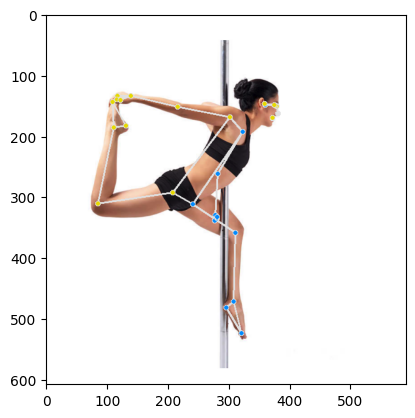

In [59]:
from PIL import Image
import matplotlib.pyplot as plt

idx = 543 ## Select Reference by Index No.

source_image_dir = 'dataset/annotated/'
ref_image = Image.open(source_image_dir + data['image_filename'][idx])
plt.imshow(ref_image)

In [61]:
import numpy as np
import math

def rotation_matrix_per_angle(axis, theta):
    axis = np.asarray(axis)
    axis = axis / math.sqrt(np.dot(axis, axis))
    a = math.cos(theta / 2.0)
    b, c, d = -axis * math.sin(theta / 2.0)
    aa, bb, cc, dd = a * a, b * b, c * c, d * d
    bc, ad, ac, ab, bd, cd = b * c, a * d, a * c, a * b, b * d, c * d
    return np.array([[aa + bb - cc - dd, 2 * (bc + ad), 2 * (bd - ac)],
                     [2 * (bc - ad), aa + cc - bb - dd, 2 * (cd + ab)],
                     [2 * (bd + ac), 2 * (cd - ab), aa + dd - bb - cc]])

def rotation_matrix_360(v, axis, angle_increment, full_circle=360):
    rotated_vectors = []
    for angle in np.arange(0, full_circle + 10, angle_increment):
        theta = -np.radians(angle)
        rot_matrix = rotation_matrix_per_angle(axis, theta)
        rotated_v = np.dot(rot_matrix, v)
        rotated_vectors.append(rotated_v)
        
    if np.allclose(rotated_vectors[0], rotated_vectors[-1], atol=1e-6):
        return rotated_vectors
    else:
        return None

# Nose Landmark
x0 = data['landmark_00_x'][idx]
y0 = data['landmark_00_y'][idx] 
z0 = data['landmark_00_z'][idx]

# Right Shoulder and Left Shoulders
x11 = data['landmark_11_x'][idx]  
y11 = data['landmark_11_y'][idx]  
z11 = data['landmark_11_z'][idx]
x12 = data['landmark_12_x'][idx] 
y12 = data['landmark_12_y'][idx]
z12 = data['landmark_12_z'][idx]

# Right Shoulder and Left Elbows
x13 = data['landmark_13_x'][idx]  
y13 = data['landmark_13_y'][idx]
z13 = data['landmark_13_z'][idx]
x14 = data['landmark_14_x'][idx]
y14 = data['landmark_14_y'][idx]
z14 = data['landmark_14_z'][idx]

# Right Shoulder and Left Wrists
x15 = data['landmark_15_x'][idx]  
y15 = data['landmark_15_y'][idx]  
z15 = data['landmark_15_z'][idx]
x16 = data['landmark_16_x'][idx] 
y16 = data['landmark_16_y'][idx]
z16 = data['landmark_16_z'][idx]

# Right and Left Hips
x23 = data['landmark_23_x'][idx]  
y23 = data['landmark_23_y'][idx]  
z23 = data['landmark_23_z'][idx]
x24 = data['landmark_24_x'][idx] 
y24 = data['landmark_24_y'][idx]
z24 = data['landmark_24_z'][idx]

# Right and Left Knees
x25 = data['landmark_25_x'][idx]  
y25 = data['landmark_25_y'][idx] 
z25 = data['landmark_25_z'][idx]
x26 = data['landmark_26_x'][idx] 
y26 = data['landmark_26_y'][idx]
z26 = data['landmark_26_z'][idx]

# Right and Left Ankles
x27 = data['landmark_27_x'][idx]  
y27 = data['landmark_27_y'][idx]  
z27 = data['landmark_27_z'][idx]
x28 = data['landmark_28_x'][idx] 
y28 = data['landmark_28_y'][idx]
z28 = data['landmark_28_z'][idx]


# Original Vectors
v0 = np.asarray([x0, y0, z0])

v11 = np.asarray([x11, y11, z11])
v12 = np.asarray([x12, y12, z12])
v13 = np.asarray([x13, y13, z13])
v14 = np.asarray([x14, y14, z14])
v15 = np.asarray([x15, y15, z15])
v16 = np.asarray([x16, y16, z16])

v23 = np.asarray([x23, y23, z23])
v24 = np.asarray([x24, y24, z24])
v25 = np.asarray([x25, y25, z25])
v26 = np.asarray([x26, y26, z26])
v27 = np.asarray([x27, y27, z27])
v28 = np.asarray([x28, y28, z28])


axis = [0, 1, 0]
angle_increment = 10 

rv0 = rotation_matrix_360(v0, axis, angle_increment)
rv11 = rotation_matrix_360(v11, axis, angle_increment)
rv12 = rotation_matrix_360(v12, axis, angle_increment)
rv13 = rotation_matrix_360(v13, axis, angle_increment)
rv14 = rotation_matrix_360(v14, axis, angle_increment)
rv15 = rotation_matrix_360(v15, axis, angle_increment)
rv16 = rotation_matrix_360(v16, axis, angle_increment)

rv23 = rotation_matrix_360(v23, axis, angle_increment)
rv24 = rotation_matrix_360(v24, axis, angle_increment)
rv25 = rotation_matrix_360(v25, axis, angle_increment)
rv26 = rotation_matrix_360(v26, axis, angle_increment)
rv27 = rotation_matrix_360(v27, axis, angle_increment)
rv28 = rotation_matrix_360(v28, axis, angle_increment)

### Visualize Results 360

In [62]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[
        go.Scatter3d(x=[v0[0]], y=[v0[1]], z=[v0[2]], mode='markers', marker=dict(color="black",size=5)),
        
        go.Scatter3d(x=[v11[0]], y=[v11[1]], z=[v11[2]], mode='markers', marker=dict(color="magenta",size=5)),
        go.Scatter3d(x=[v12[0]], y=[v12[1]], z=[v12[2]], mode='markers', marker=dict(color="lime",size=5)),
        go.Scatter3d(x=[v13[0]], y=[v13[1]], z=[v13[2]], mode='markers', marker=dict(color="magenta",size=5)),
        go.Scatter3d(x=[v14[0]], y=[v14[1]], z=[v14[2]], mode='markers', marker=dict(color="lime",size=5)),
        go.Scatter3d(x=[v15[0]], y=[v15[1]], z=[v15[2]], mode='markers', marker=dict(color="magenta",size=5)),
        go.Scatter3d(x=[v16[0]], y=[v16[1]], z=[v16[2]], mode='markers', marker=dict(color="lime",size=5)),
        
        go.Scatter3d(x=[v23[0]], y=[v23[1]], z=[v23[2]], mode='markers', marker=dict(color="magenta",size=5)),
        go.Scatter3d(x=[v24[0]], y=[v24[1]], z=[v24[2]], mode='markers', marker=dict(color="lime",size=5)),
        go.Scatter3d(x=[v25[0]], y=[v25[1]], z=[v25[2]], mode='markers', marker=dict(color="magenta",size=5)),
        go.Scatter3d(x=[v26[0]], y=[v26[1]], z=[v26[2]], mode='markers', marker=dict(color="lime",size=5)),
        go.Scatter3d(x=[v27[0]], y=[v27[1]], z=[v27[2]], mode='markers', marker=dict(color="magenta",size=5)),
        go.Scatter3d(x=[v28[0]], y=[v28[1]], z=[v28[2]], mode='markers', marker=dict(color="lime",size=5)),
        
        go.Scatter3d(
            x=[v11[0], v12[0], v24[0], v23[0], v11[0]],
            y=[v11[1], v12[1], v24[1], v23[1], v11[1]],
            z=[v11[2], v12[2], v24[2], v23[2], v11[2]],
            mode='lines',
            line=dict(color='silver', width=5)),

        go.Scatter3d(
            x=[v11[0], v13[0]],
            y=[v11[1], v13[1]],
            z=[v11[2], v13[2]],
            mode='lines',
            line=dict(color='silver', width=5)),

        go.Scatter3d(
            x=[v15[0], v13[0]],
            y=[v15[1], v13[1]],
            z=[v15[2], v13[2]],
            mode='lines',
            line=dict(color='silver', width=5)),
        
        go.Scatter3d(
            x=[v12[0], v14[0]],
            y=[v12[1], v14[1]],
            z=[v12[2], v14[2]],
            mode='lines',
            line=dict(color='silver', width=5)),

        go.Scatter3d(
            x=[v16[0], v14[0]],
            y=[v16[1], v14[1]],
            z=[v16[2], v14[2]],
            mode='lines',
            line=dict(color='silver', width=5)),

        go.Scatter3d(
            x=[v23[0], v25[0]],
            y=[v23[1], v25[1]],
            z=[v23[2], v25[2]],
            mode='lines',
            line=dict(color='silver', width=5)),

        go.Scatter3d(
            x=[v27[0], v25[0]],
            y=[v27[1], v25[1]],
            z=[v27[2], v25[2]],
            mode='lines',
            line=dict(color='silver', width=5)),
        
        go.Scatter3d(
            x=[v24[0], v26[0]],
            y=[v24[1], v26[1]],
            z=[v24[2], v26[2]],
            mode='lines',
            line=dict(color='silver', width=5)),

        go.Scatter3d(
            x=[v28[0], v26[0]],
            y=[v28[1], v26[1]],
            z=[v28[2], v26[2]],
            mode='lines',
            line=dict(color='silver', width=5)),

    ],
        
    layout=go.Layout(
        title="Vector Rotation on Selected Landmarks",
            width=700, height=1000, 
            scene=dict(
                xaxis=dict(range=[-1, 1], autorange=False),
                yaxis=dict(range=[0, 1], autorange="reversed"),
                zaxis=dict(range=[-2, 2], autorange=False),
                aspectmode='cube'
            ),
            updatemenus=[{
                "type": "buttons",
                "buttons": [{
                    "label": "Play",
                    "method": "animate",
                    "args": [None, {"frame": {"duration": 500, "redraw": True}, "fromcurrent": True, "transition": {"duration": 300}}],
                }],
                "direction": "left",
                "pad": {"r": 10, "t": 87},
                "showactive": False,
                "type": "buttons",
                "x": 0.1,
                "xanchor": "right",
                "y": 0,
                "yanchor": "top"
            }],
            sliders=[{
                "steps": [{"method": "animate", "args": [[f"frame{step}"], {"mode": "immediate", "frame": {"duration": 500, "redraw": True}, "transition": {"duration": 300}}], "label": f"{angle_increment * step} degrees"} for step in range(len(rv0))],
            }]
        ),
        frames = [
            go.Frame(
                data=[
                    go.Scatter3d(x=[rv0[step][0]], y=[rv0[step][1]], z=[rv0[step][2]], mode='markers', marker=dict(color="black", size=5)),
                    
                    go.Scatter3d(x=[rv11[step][0]], y=[rv11[step][1]], z=[rv11[step][2]], mode='markers', marker=dict(color="magenta", size=5)),
                    go.Scatter3d(x=[rv12[step][0]], y=[rv12[step][1]], z=[rv12[step][2]], mode='markers', marker=dict(color="lime", size=5)),
                    go.Scatter3d(x=[rv13[step][0]], y=[rv13[step][1]], z=[rv13[step][2]], mode='markers', marker=dict(color="magenta", size=5)),
                    go.Scatter3d(x=[rv14[step][0]], y=[rv14[step][1]], z=[rv14[step][2]], mode='markers', marker=dict(color="lime", size=5)),
                    go.Scatter3d(x=[rv15[step][0]], y=[rv15[step][1]], z=[rv15[step][2]], mode='markers', marker=dict(color="magenta", size=5)),
                    go.Scatter3d(x=[rv16[step][0]], y=[rv16[step][1]], z=[rv16[step][2]], mode='markers', marker=dict(color="lime", size=5)),
                    
                    go.Scatter3d(x=[rv23[step][0]], y=[rv23[step][1]], z=[rv23[step][2]], mode='markers', marker=dict(color="magenta", size=5)),
                    go.Scatter3d(x=[rv24[step][0]], y=[rv24[step][1]], z=[rv24[step][2]], mode='markers', marker=dict(color="lime", size=5)),
                    go.Scatter3d(x=[rv25[step][0]], y=[rv25[step][1]], z=[rv25[step][2]], mode='markers', marker=dict(color="magenta", size=5)),
                    go.Scatter3d(x=[rv26[step][0]], y=[rv26[step][1]], z=[rv26[step][2]], mode='markers', marker=dict(color="lime", size=5)),
                    go.Scatter3d(x=[rv27[step][0]], y=[rv27[step][1]], z=[rv27[step][2]], mode='markers', marker=dict(color="magenta", size=5)),
                    go.Scatter3d(x=[rv28[step][0]], y=[rv28[step][1]], z=[rv28[step][2]], mode='markers', marker=dict(color="lime", size=5)),
                    
                    go.Scatter3d(
                        x=[rv11[step][0], rv12[step][0], rv24[step][0], rv23[step][0], rv11[step][0]],  # Closing the loop by repeating the first point
                        y=[rv11[step][1], rv12[step][1], rv24[step][1], rv23[step][1], rv11[step][1]],
                        z=[rv11[step][2], rv12[step][2], rv24[step][2], rv23[step][2], rv11[step][2]],
                        mode='lines',
                        line=dict(color='silver', width=5)
                    ),

                    go.Scatter3d(
                        x=[rv11[step][0], rv13[step][0]],
                        y=[rv11[step][1], rv13[step][1]],
                        z=[rv11[step][2], rv13[step][2]],
                        mode='lines',
                        line=dict(color='silver', width=5)
                    ),

                    go.Scatter3d(
                        x=[rv15[step][0], rv13[step][0]],
                        y=[rv15[step][1], rv13[step][1]],
                        z=[rv15[step][2], rv13[step][2]],
                        mode='lines',
                        line=dict(color='silver', width=5)
                    ),
                    
                    go.Scatter3d(
                        x=[rv12[step][0], rv14[step][0]],
                        y=[rv12[step][1], rv14[step][1]],
                        z=[rv12[step][2], rv14[step][2]],
                        mode='lines',
                        line=dict(color='silver', width=5)
                    ),

                    go.Scatter3d(
                        x=[rv16[step][0], rv14[step][0]],
                        y=[rv16[step][1], rv14[step][1]],
                        z=[rv16[step][2], rv14[step][2]],
                        mode='lines',
                        line=dict(color='silver', width=5)
                    ),
                    
                    go.Scatter3d(
                        x=[rv23[step][0], rv25[step][0]],
                        y=[rv23[step][1], rv25[step][1]],
                        z=[rv23[step][2], rv25[step][2]],
                        mode='lines',
                        line=dict(color='silver', width=5)
                    ),

                    go.Scatter3d(
                        x=[rv27[step][0], rv25[step][0]],
                        y=[rv27[step][1], rv25[step][1]],
                        z=[rv27[step][2], rv25[step][2]],
                        mode='lines',
                        line=dict(color='silver', width=5)
                    ),
                    
                    go.Scatter3d(
                        x=[rv24[step][0], rv26[step][0]],
                        y=[rv24[step][1], rv26[step][1]],
                        z=[rv24[step][2], rv26[step][2]],
                        mode='lines',
                        line=dict(color='silver', width=5)
                    ),

                    go.Scatter3d(
                        x=[rv28[step][0], rv26[step][0]],
                        y=[rv28[step][1], rv26[step][1]],
                        z=[rv28[step][2], rv26[step][2]],
                        mode='lines',
                        line=dict(color='silver', width=5)
                    ),
                ],
                name=f"frame{step}"
            ) for step in range(len(rv0)) # Since all of them are the same length
        ]
    )

fig.add_trace(go.Scatter3d(x=[-1, 1], y=[0, 0], z=[0, 0],mode='lines',line=dict(color='red', width=2, dash='dash'),name='X axis'))
fig.add_trace(go.Scatter3d(x=[0,0], y=[0, 1], z=[0, 0],mode='lines',line=dict(color='green', width=2, dash='dash'),name='Y axis'))
fig.add_trace(go.Scatter3d(x=[0,0], y=[0, 0], z=[-2, 2],mode='lines',line=dict(color='blue', width=2, dash='dash'),name='Z axis'))


fig.update_layout(
    scene = dict(
        xaxis = dict(backgroundcolor="rgb(230, 230, 255)",gridcolor="white",showbackground=True,zerolinecolor="white",),
        yaxis = dict(backgroundcolor="rgb(230, 255, 230)",gridcolor="white",showbackground=True,zerolinecolor="white",),
        zaxis = dict(backgroundcolor="rgb(255, 230, 255)",gridcolor="white",showbackground=True,zerolinecolor="white",),
))

camera = dict(up=dict(x=0, y=-1.5, z=0),eye=dict(x=-2.5, y=0.1, z=-2.5))

fig.update_layout(
    scene_camera = camera)

fig.show()

## Rotation Matrix Implementation (Batch)

In [68]:
def rotate_pose(pose, axis, angle_increment=10, full_circle=360):
    rotated_poses = []
    for theta in np.arange(0, full_circle, angle_increment):
        rotated_pose = {'theta': theta}
        for landmark in range(33):  # Assuming 33 landmarks
            x = pose[f'landmark_{landmark:02}_x']
            y = pose[f'landmark_{landmark:02}_y']
            z = pose[f'landmark_{landmark:02}_z']
            v = np.array([x, y, z])
            rotation_matrix = rotation_matrix_per_angle(axis, -np.radians(theta))
            rotated_v = np.dot(rotation_matrix, v)
            rotated_pose.update({
                f'landmark_{landmark:02}_x': rotated_v[0],
                f'landmark_{landmark:02}_y': rotated_v[1],
                f'landmark_{landmark:02}_z': rotated_v[2],
            })
        rotated_poses.append(rotated_pose)
    return rotated_poses

axis = [0, 1, 0]  # y-axis for vertical rotation
angle_increment = 10

all_rotated_poses = []

data['label'] = data['pose_name'].str.replace('-lft', '').str.replace('-rgt', '')
label_to_int = {label: idx for idx, label in enumerate(np.unique(data['label']))}

for index, row in data.iterrows():
    pose_name = row['pose_name']
    image_filename = row['image_filename']

    # Remove '-lft' and '-rgt' from pose_name for encoding
    label = pose_name.replace('-lft', '').replace('-rgt', '')
    label_encoded = label_to_int[label]  # Encode the label

    rotated_poses = rotate_pose(row, axis, angle_increment)
    for rotated_pose in rotated_poses:
        updated_pose = {
            'image_filename': image_filename,
            'pose_name': pose_name,
            'label_encoded': label_encoded  # Add encoded label as the third key
        }
        updated_pose.update(rotated_pose)
        all_rotated_poses.append(updated_pose)

rotated_poses_df = pd.DataFrame(all_rotated_poses)
rotated_poses_df

,image_filename,pose_name,label_encoded,theta,landmark_00_x,landmark_00_y,landmark_00_z,landmark_01_x,landmark_01_y,landmark_01_z,...,landmark_29_z,landmark_30_x,landmark_30_y,landmark_30_z,landmark_31_x,landmark_31_y,landmark_31_z,landmark_32_x,landmark_32_y,landmark_32_z
0,advanced-figurehead-lft.png,advanced-figurehead-lft,0,0,0.545408,0.740922,-0.407526,0.529543,0.728610,-0.377108,...,0.468260,0.301245,0.325765,-0.279319,0.178496,0.312144,0.396094,0.165575,0.312704,-0.299426
1,advanced-figurehead-lft.png,advanced-figurehead-lft,0,10,0.607888,0.740922,-0.306625,0.586982,0.728610,-0.279425,...,0.514853,0.345172,0.325765,-0.222765,0.107004,0.312144,0.421072,0.215054,0.312704,-0.266125
2,advanced-figurehead-lft.png,advanced-figurehead-lft,0,20,0.651898,0.740922,-0.196408,0.626586,0.728610,-0.173252,...,0.545803,0.378611,0.325765,-0.159442,0.032260,0.312144,0.433256,0.257999,0.312704,-0.224739
3,advanced-figurehead-lft.png,advanced-figurehead-lft,0,30,0.676100,0.740922,-0.080224,0.647152,0.728610,-0.061814,...,0.560169,0.400546,0.325765,-0.091275,-0.043465,0.312144,0.432276,0.293105,0.312704,-0.176523
4,advanced-figurehead-lft.png,advanced-figurehead-lft,0,40,0.679759,0.740922,0.038399,0.648054,0.728610,0.051502,...,0.557515,0.410310,0.325765,-0.020334,-0.117868,0.312144,0.418161,0.319305,0.312704,-0.122944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19579,yogini-twisted-rgt.png,yogini-twisted-rgt,271,310,0.221597,0.731075,-0.655868,0.241815,0.751349,-0.633527,...,-0.188110,0.205020,0.697971,-0.118801,0.537527,0.136663,-0.257138,0.179851,0.763012,-0.090221
19580,yogini-twisted-rgt.png,yogini-twisted-rgt,271,320,0.332121,0.731075,-0.607424,0.348152,0.751349,-0.581912,...,-0.089076,0.222535,0.697971,-0.081394,0.574013,0.136663,-0.159891,0.192785,0.763012,-0.057619
19581,yogini-twisted-rgt.png,yogini-twisted-rgt,271,330,0.432553,0.731075,-0.540524,0.443911,0.751349,-0.512615,...,0.012664,0.233288,0.697971,-0.041515,0.593057,0.136663,-0.057786,0.199862,0.763012,-0.023267
19582,yogini-twisted-rgt.png,yogini-twisted-rgt,271,340,0.519843,0.731075,-0.457200,0.526182,0.751349,-0.427743,...,0.114019,0.236953,0.697971,-0.000374,0.594081,0.136663,0.046075,0.200866,0.763012,0.011792


In [69]:
rotated_poses_df.to_csv("dataset/pose_data_augmented.csv", index=False)